<a href="https://colab.research.google.com/github/abhitiwari007/Women_Cloth_Reviews/blob/main/Women_Cloth_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Women Cloth Reviews**

# **Objective**
Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing. It is also suitable for text classification with discrete feature. In this project it will be used to build a women cloth review prediction model.



# **Data Source**
https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv

In [ ]:
# @title Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools



In [ ]:
# @title Import Data
df=pd. read_csv('https://raw.githubusercontent.com/YBI-Foundation/Teaching-Data/main/Women%20Clothing%20E-Commerce%20Review.csv')

In [ ]:

df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [ ]:
df.shape

(23486, 10)

In [ ]:
#  @title Describe data
data_path = 'https://raw.githubusercontent.com/YBI-Foundation/Teaching-Data/main/Women%20Clothing%20E-Commerce%20Review.csv'
df = pd.read_csv(data_path)
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df['Recommended']

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: Recommended, Length: 23486, dtype: int64

In [ ]:

print(df.describe())
print("\n \n Shape of the data :", df.shape)
print("\n \n The info of the data :", df.info)

        Clothing ID           Age        Rating   Recommended  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean     918.118709     43.198544      4.196032      0.822362   
std      203.298980     12.279544      1.110031      0.382216   
min        0.000000     18.000000      1.000000      0.000000   
25%      861.000000     34.000000      4.000000      1.000000   
50%      936.000000     41.000000      5.000000      1.000000   
75%     1078.000000     52.000000      5.000000      1.000000   
max     1205.000000     99.000000      5.000000      1.000000   

       Positive Feedback  
count       23486.000000  
mean            2.535936  
std             5.702202  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             3.000000  
max           122.000000  

 
 Shape of the data : (23486, 10)

 
 The info of the data : <bound method DataFrame.info of        Clothing ID  Age                                              Title  

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
Clothing ID,23486.00,918.12,203.30,0.00,861.00,936.00,1078.00,1205.00
Age,23486.00,43.20,12.28,18.00,34.00,41.00,52.00,99.00
Rating,23486.00,4.20,1.11,1.00,4.00,5.00,5.00,5.00
Recommended,23486.00,0.82,0.38,0.00,1.00,1.00,1.00,1.00
Positive Feedback,23486.00,2.54,5.70,0.00,0.00,1.00,3.00,122.00


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division,23472,3,General,13850
Department,23472,6,Tops,10468
Category,23472,20,Dresses,6319


In [ ]:
# @title Data Visualization
colnames = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Teaching-Data/main/Women%20Clothing%20E-Commerce%20Review.csv') # Fix the URL by changing 'ttps' to 'https'
colnames.columns = ('Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommend', 'Positive Feedback', 'Division', 'Department', ' Category ')

In [ ]:
str(colnames)

"       Clothing ID  Age                                              Title  \\\n0              767   33                                                NaN   \n1             1080   34                                                NaN   \n2             1077   60                            Some major design flaws   \n3             1049   50                                   My favorite buy!   \n4              847   47                                   Flattering shirt   \n...            ...  ...                                                ...   \n23481         1104   34                     Great dress for many occasions   \n23482          862   48                         Wish it was made of cotton   \n23483         1104   31                              Cute, but see through   \n23484         1084   28  Very cute dress, perfect for summer parties an...   \n23485         1104   52                    Please make more like this one!   \n\n                                                

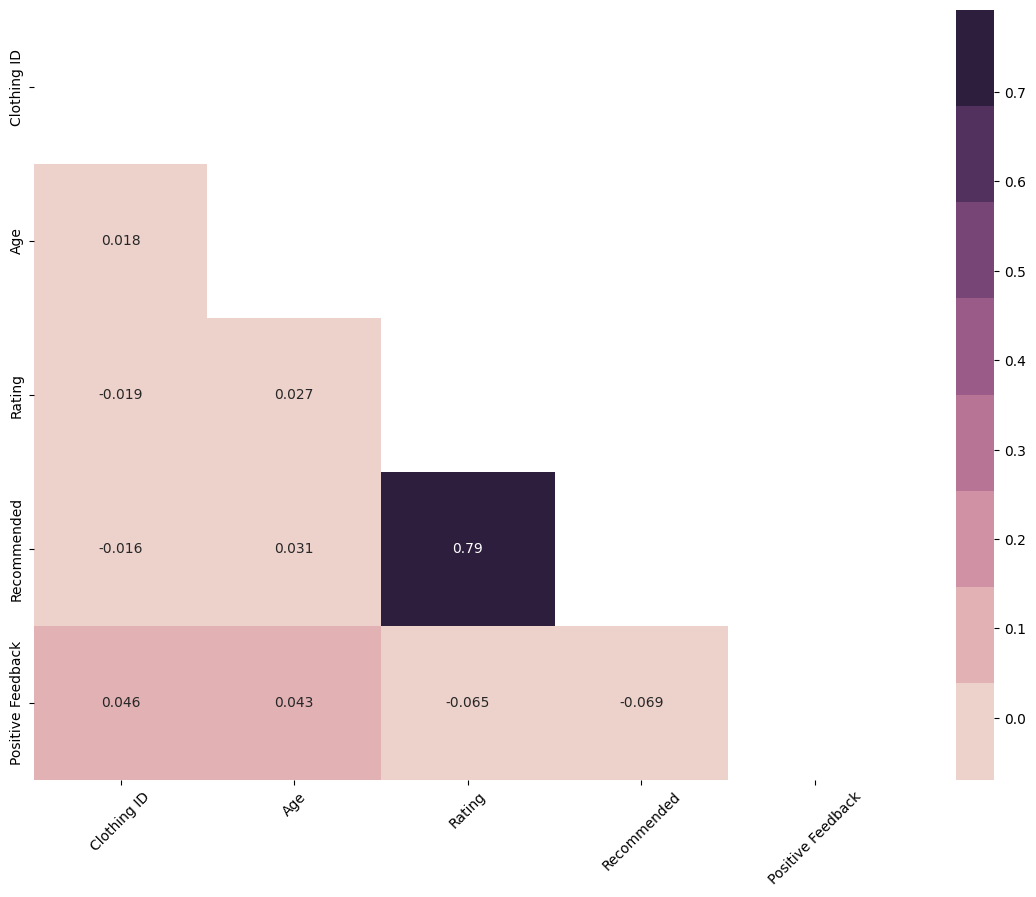

In [ ]:

object_columns = df.select_dtypes(include='object').columns
df_numeric = df.drop(columns=object_columns)
matrix = np.triu(df_numeric.corr())
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap=sns.cubehelix_palette(8), mask=matrix)
plt.xticks(rotation=45);

In [ ]:
# @title Recommended
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [ ]:
df["Recommended"].value_counts()

Recommended
1    19314
0     4172
Name: count, dtype: int64

In [ ]:
df["Recommended"].value_counts()


Recommended
1    19314
0     4172
Name: count, dtype: int64

In [ ]:
first_look("Recommended")

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64
Recommended
1    19314
0     4172
Name: count, dtype: int64


In [ ]:
df["Recommended"].describe().T

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64

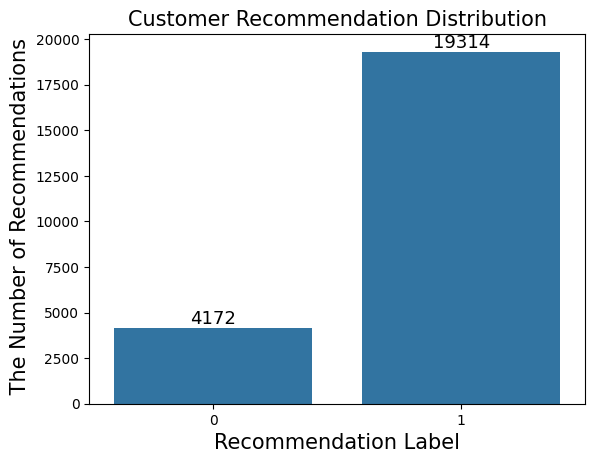

In [ ]:
sns.countplot(x = df.Recommended, data = df)
plt.title('Customer Recommendation Distribution', fontsize=15)
plt.xlabel("Recommendation Label", fontsize=15)
plt.ylabel(" The Number of Recommendations", fontsize=15)

for index,value in enumerate(df.Recommended.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

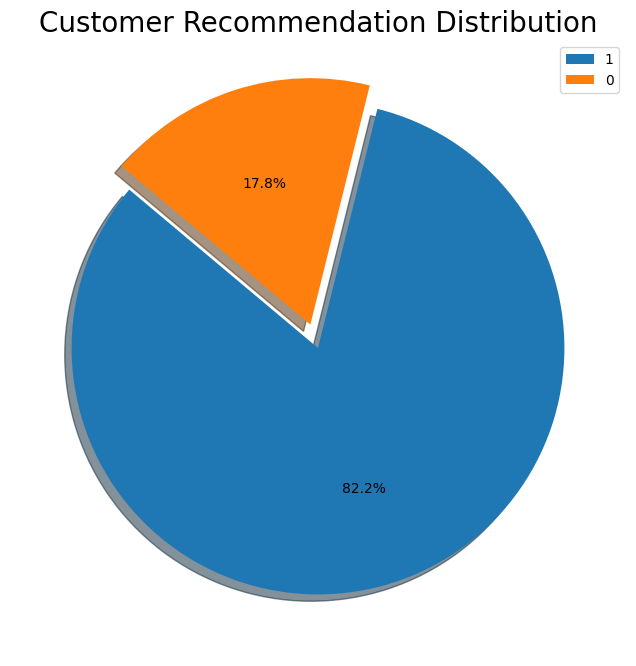

In [ ]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df['Recommended'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution', fontsize=20)
plt.axis('off');

In [ ]:
# @title Age
df["Age"].value_counts()

Age
39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: count, Length: 77, dtype: int64

In [ ]:
first_look("Age")

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64
Recommended
1    19314
0     4172
Name: count, dtype: int64


In [ ]:
df["Age"].describe().T

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

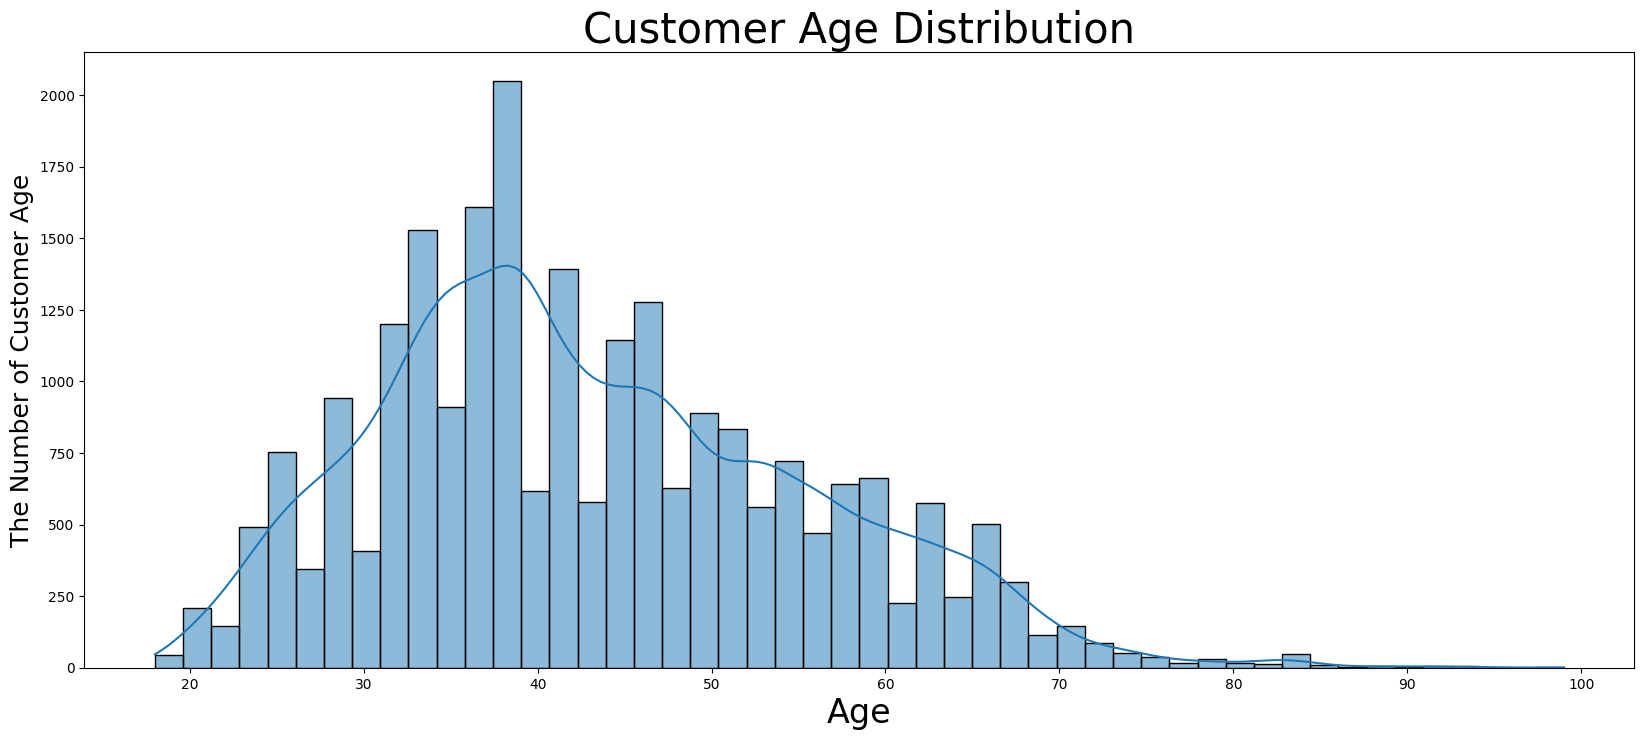

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Age Distribution', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)

sns.histplot(df, x='Age', kde = True, bins = 50);

In [ ]:
# @title Positive Feedback
df["Positive Feedback"].value_counts()

Positive Feedback
0      11176
1       4043
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: count, Length: 82, dtype: int64

In [ ]:
first_look("Positive Feedback")

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64
Recommended
1    19314
0     4172
Name: count, dtype: int64


In [ ]:
df["Positive Feedback"].describe().T

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback, dtype: float64

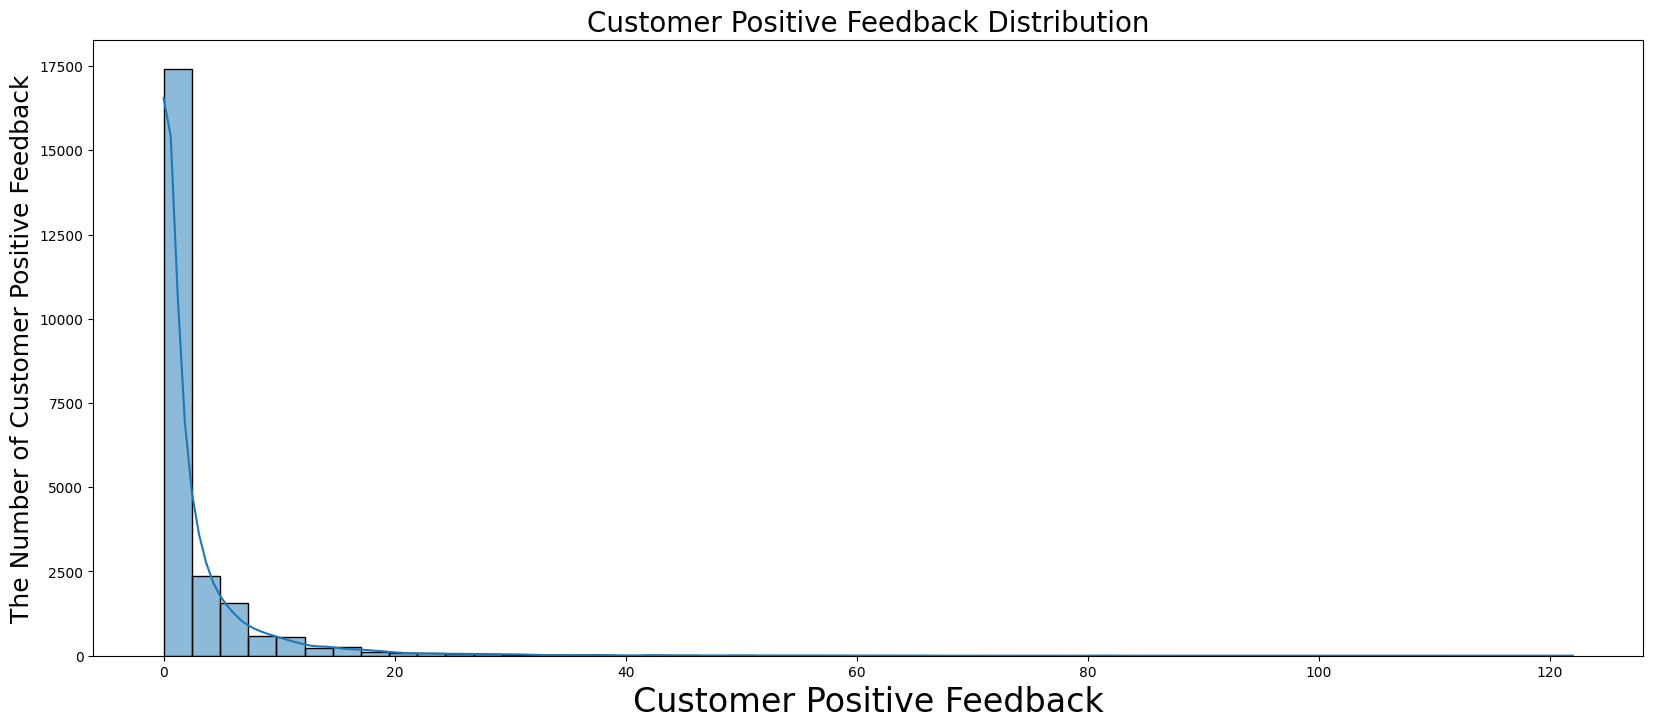

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Positive Feedback Distribution', fontsize=20)
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("The Number of Customer Positive Feedback", fontsize=18)
sns.histplot(df, x='Positive Feedback', kde = True, bins = 50);

In [ ]:
# @title Division
df["Division"].value_counts()

Division
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64

In [ ]:
first_look("Division")

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64
Recommended
1    19314
0     4172
Name: count, dtype: int64


In [ ]:
df["Division"].describe().T

count       23472
unique          3
top       General
freq        13850
Name: Division, dtype: object

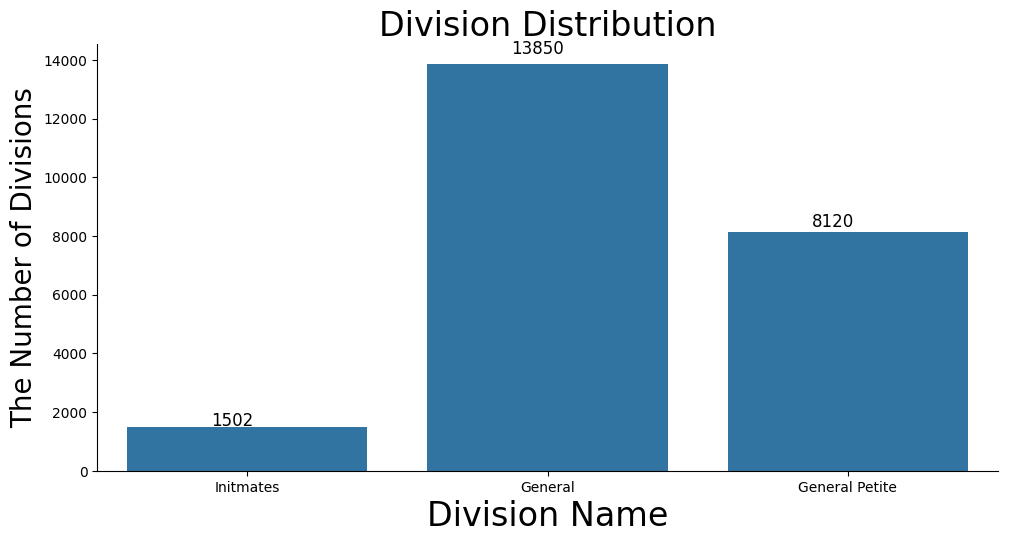

In [ ]:
g = sns.catplot( x='Division',
             kind="count",
             data=df,
             height=5,
             aspect=2)
plt.title('Division Distribution', fontsize=24)
plt.xlabel("Division Name", fontsize=24)
plt.ylabel("The Number of Divisions", fontsize=20)
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

In [ ]:
# @title Rating
df["Rating"].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [ ]:
first_look("Rating")

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64
Recommended
1    19314
0     4172
Name: count, dtype: int64


In [ ]:
df["Rating"].describe().T

count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

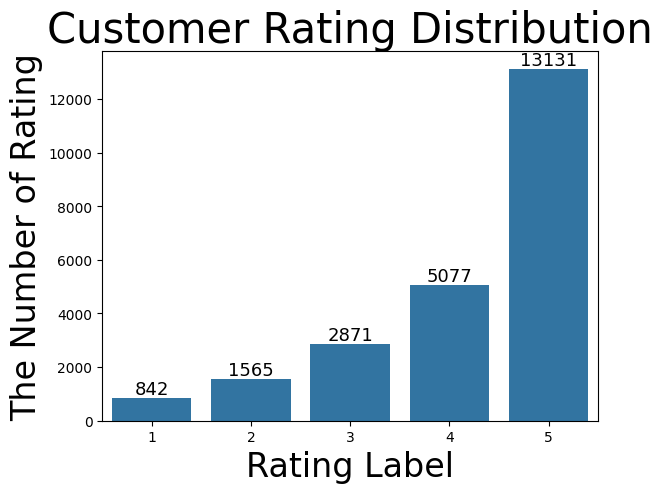

In [ ]:
sns.countplot(x = df.Rating, data = df)
plt.title('Customer Rating Distribution', fontsize=30)
plt.xlabel("Rating Label", fontsize=24)
plt.ylabel("The Number of Rating", fontsize=24)
for index,value in enumerate(df.Rating.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13);

In [ ]:
# @title Department
df["Department"].value_counts()

Department
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

In [ ]:
first_look("Department")

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64
Recommended
1    19314
0     4172
Name: count, dtype: int64


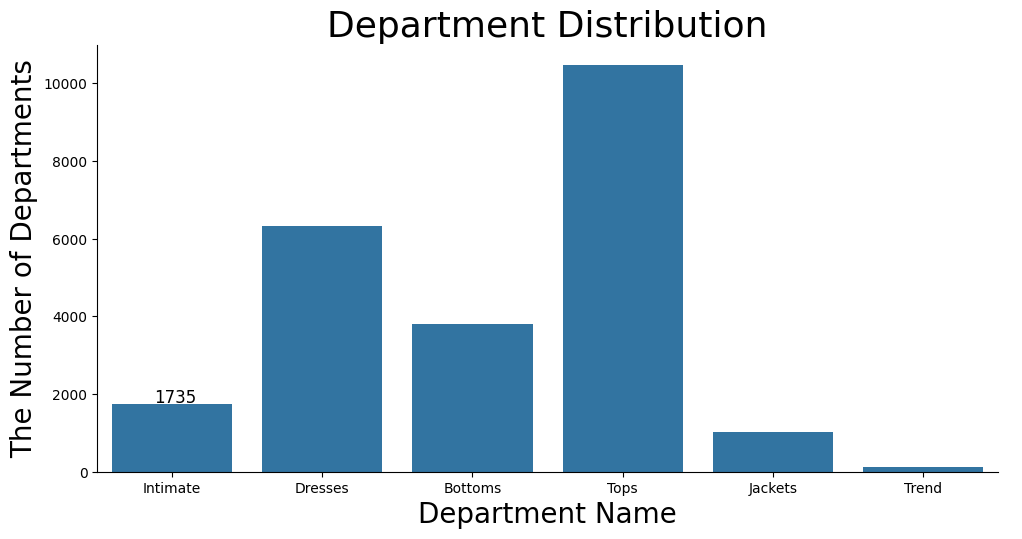

In [ ]:
g = sns.catplot(data = df, x ="Department", kind='count', height=5, aspect=2)
plt.title('Department Distribution', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Departments", fontsize=20)
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')
    plt.show()

In [ ]:
# @title Category
df["Category"].value_counts()

Category
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [ ]:
first_look("Category")

count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Recommended, dtype: float64
Recommended
1    19314
0     4172
Name: count, dtype: int64


In [ ]:
df["Category"].describe().T

count       23472
unique         20
top       Dresses
freq         6319
Name: Category, dtype: object

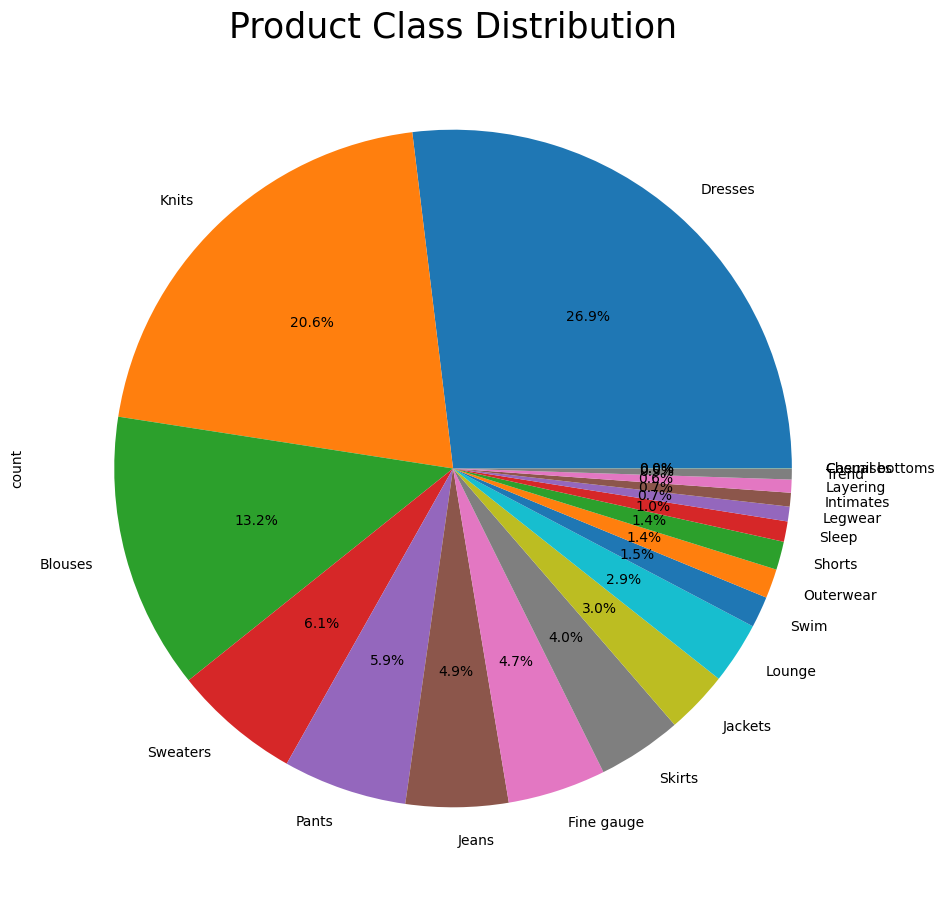

In [ ]:
plt.title('Product Class Distribution', fontsize=25)
df["Category"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(16, 11));

In [ ]:
# @title Data preprocessing
df.isna().sum()


Clothing ID             0
Age                     0
Title                3810
Review                845
Rating                  0
Recommended             0
Positive Feedback       0
Division               14
Department             14
Category               14
dtype: int64

In [ ]:
df.nunique()

Clothing ID           1206
Age                     77
Title                13993
Review               22634
Rating                   5
Recommended              2
Positive Feedback       82
Division                 3
Department               6
Category                20
dtype: int64

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

def preprocess(raw_text):
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = WordNetLemmatizer()

    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)

    lemmas = []
    for word in cleaned_words:
        word = lemmatizer.lemmatize(word)
        lemmas.append(word)

    return " ".join(lemmas)


df['Review'] = df['Review'].astype(str)
df['clean_review_text'] = df['Review'].apply(preprocess)
df[['Review','clean_review_text']].head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,clean_review_text
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store gla...
2,I had such high hopes for this dress and reall...,high hope dress really wanted work initially o...


In [ ]:
# @title Define Target Variable (y) and Feature Variables (X)
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category',
       'clean_review_text'],
      dtype='object')

In [ ]:
x = df['Review']

In [ ]:
y = df['Rating']

In [ ]:
df['Rating'].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [ ]:
#  @title Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, stratify = y, random_state = 2529)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16440,), (7046,), (16440,), (7046,))

In [ ]:
# @title Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

MultinomialNB()

In [ ]:
# @title Model prediction
X_test_transformed = vectorizer.transform(X_test)
y_pred = model.predict(X_test_transformed)
y_pred.shape

(7046,)

In [ ]:
y_pred

array([4, 5, 5, ..., 5, 5, 5])

In [ ]:
model.predict_proba(X_test_transformed)

array([[4.33027530e-12, 2.67956569e-06, 8.65487379e-02, 9.12611723e-01,
        8.36859857e-04],
       [1.36869022e-07, 2.60958319e-05, 1.31074455e-02, 1.26329207e-01,
        8.60537114e-01],
       [1.65510104e-02, 1.22338768e-02, 4.81507086e-02, 1.74740905e-01,
        7.48323499e-01],
       ...,
       [1.64327717e-03, 2.18695652e-02, 1.11505353e-01, 2.94602864e-01,
        5.70378941e-01],
       [1.01399094e-20, 5.98202646e-13, 1.30103023e-10, 1.14427416e-02,
        9.88557258e-01],
       [7.03679947e-16, 7.53114734e-12, 1.28387796e-08, 2.36730951e-04,
        9.99763256e-01]])

In [ ]:
# @title Model evaluation
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[  12   53  121   26   41]
 [   3   32  263   90   82]
 [   5   25  385  277  169]
 [   0    2  163  543  815]
 [   1    3   68  367 3500]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.05      0.09       253
           2       0.28      0.07      0.11       470
           3       0.39      0.45      0.41       861
           4       0.42      0.36      0.38      1523
           5       0.76      0.89      0.82      3939

    accuracy                           0.63      7046
   macro avg       0.48      0.36      0.36      7046
weighted avg       0.60      0.63      0.60      7046



# **Explanation**
This project focuses on building predictive models. First, both the required libraries and the test data set are introduced. The data set was observed and pre-processed to prepare it for its use, then part of it was kept for testing and the rest was used to train the model and use the model to derive a data set of predictions. Finally, the prediction accuracy was checked using the test data set, some adjustments were made, and the model was retrained to achieve better accuracy. This project focuses on building predictive models. First, both the required libraries and the test data set are introduced. The data set was observed and pre-processed to prepare it for its use, then part of it was kept for testing and the rest was used to train the model and use the model to derive a data set of predictions. Finally, the prediction accuracy was checked using the test data set, some adjustments were made, and the model was retrained to achieve better accuracy.